## Loading Packages

In [1]:
import warnings

import xarray as xr
import getpass

%matplotlib inline
warnings.simplefilter("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

## Instantiate connection

In [3]:
'''store, in python variables, values of USERNAME and PASSWORD 
(or request them from free) as well as the DATASET_ID.'''

USERNAME = 'jschnell'
PASSWORD = getpass.getpass('Enter your password: ')

Enter your password: ········


In [4]:
DATASET_ID = 'cmems_mod_glo_phy_anfc_merged-uv_PT1H-i'

In [5]:
'''instantiate the connection to the OPeNDAP server thanks to a local 
function copernicusmarine_datastore(): '''

#! /usr/bin/env python3
# -*- coding: utf-8 -*-
__author__ = "Copernicus Marine User Support Team"
__copyright__ = "(C) 2021 E.U. Copernicus Marine Service Information"
__credits__ = ["E.U. Copernicus Marine Service Information"]
__license__ = "MIT License - You must cite this source"
__version__ = "202104"
__maintainer__ = "D. Bazin, E. DiMedio, C. Giordan"
__email__ = "servicedesk dot cmems at mercator hyphen ocean dot eu"

def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    cas_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(cas_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        data_store = xr.backends.PydapDataStore(open_url(url, session=session))
    return data_store


In [6]:
data_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

In [7]:
dataset = xr.open_dataset(data_store)
dataset.head()

<xarray.Dataset>
Dimensions:    (longitude: 5, latitude: 5, depth: 1, time: 5)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 -179.8 -179.7
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 -79.75 -79.67
  * depth      (depth) float32 0.494
  * time       (time) datetime64[ns] 2020-11-01T00:30:00 ... 2020-11-01T04:30:00
Data variables:
    utotal     (time, depth, latitude, longitude) float32 ...
    vtotal     (time, depth, latitude, longitude) float32 ...
    utide      (time, depth, latitude, longitude) float32 ...
    vtide      (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    vsdx       (time, depth, latitude, longitude) float32 ...
    vsdy       (time, depth, latitude, longitude) float32 ...
Attributes:
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         hourly mean merged surface currents from o...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLO12, mfwamglo, FES2014
    licence:                       http://marine.copernicus.eu/services-portf...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    institution:                   MERCATOR OCEAN

<xarray.DataArray 'time' ()>
array('2023-03-15T14:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-03-15T14:30:00
Attributes:
    long_name:      Time
    standard_name:  time
    axis:           T
    _ChunkSizes:    1024

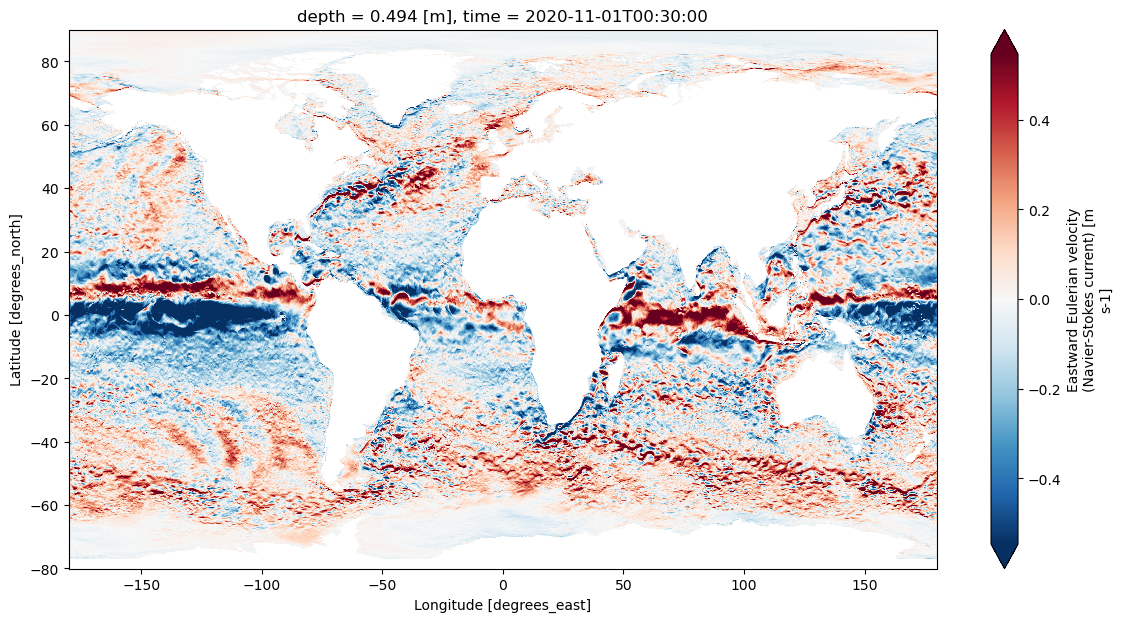

In [10]:
# Plot one variable in the dataset for a specific time slice
dataset.uo.isel(time=0, depth=0).plot(robust=True, aspect=2, size=7);

In [8]:
time_slice = ["2023-03-06T00:00:00", "2023-03-07T00:00:00"]
lon_min = -180
lat_min = -90
lon_max = 180
lat_max = 90
var = ["utotal", "vtotal"]

In [9]:
dataset[var].sel(time = slice(*time_slice))

<xarray.Dataset>
Dimensions:    (time: 24, depth: 1, latitude: 2041, longitude: 4320)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494
  * time       (time) datetime64[ns] 2023-03-06T00:30:00 ... 2023-03-06T23:30:00
Data variables:
    utotal     (time, depth, latitude, longitude) float32 ...
    vtotal     (time, depth, latitude, longitude) float32 ...
Attributes:
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         hourly mean merged surface currents from o...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLO12, mfwamglo, FES2014
    licence:                       http://marine.copernicus.eu/services-portf...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    institution:                   MERCATOR OCEAN

In [10]:
# subset space, time and variable

# by value
res = dataset[var].sel(time=slice(*time_slice), longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
# by index
#wave_height = dataset[var].isel(time=6000, longitude=slice(1200, 2100), latitude=slice(1350, 1520))
res
# plot
#wave_height.plot(robust=True, aspect=2, size=7);

<xarray.Dataset>
Dimensions:    (time: 24, depth: 1, latitude: 2041, longitude: 4320)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494
  * time       (time) datetime64[ns] 2023-03-06T00:30:00 ... 2023-03-06T23:30:00
Data variables:
    utotal     (time, depth, latitude, longitude) float32 ...
    vtotal     (time, depth, latitude, longitude) float32 ...
Attributes:
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         hourly mean merged surface currents from o...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLO12, mfwamglo, FES2014
    licence:                       http://marine.copernicus.eu/services-portf...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    institution:                   MERCATOR OCEAN

In [62]:
res.time[0].data.tolist()


1678062600000000000

In [63]:
res.to_netcdf("./world_strom_20230306_20230307.nc")

In [ ]:
dataset.isel(time=0, depth=0).to_netcdf("./world_strom.nc")

In [ ]:
data = xr.open_dataset("./world_strom.nc")

In [ ]:
datau